# Finding out the most commonly reported side effects of the COVID-19 AstraZeneca vaccination

Data is automatically downloaded from the Yellow Card Scheme website.

For more deatils see: https://www.gov.uk/government/publications/coronavirus-covid-19-vaccine-adverse-reactions

***

In [1]:
library("pdftools")
library("stringr")
library("kableExtra")
library("IRdisplay")

Warning message:
"package 'pdftools' was built under R version 3.5.3"
Warning message:
"package 'stringr' was built under R version 3.5.3"


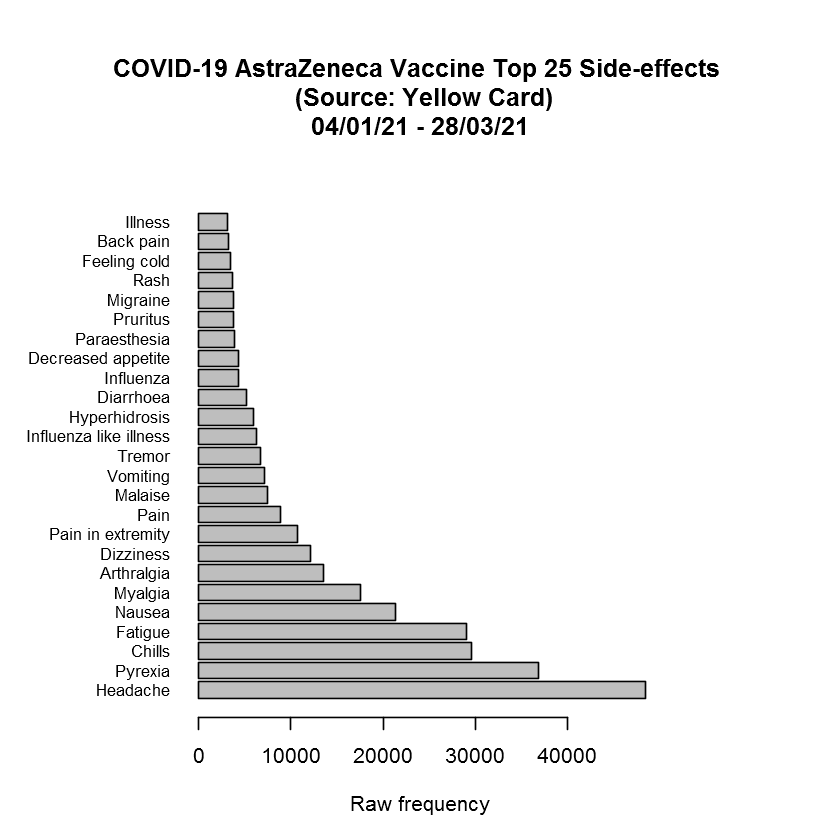

In [2]:
# Download data
url<-"https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data"
url<-paste0(url,"/file/964208/COVID-19_AstraZeneca_Vaccine_Analysis_Print__2_.pdf")

download.file(url, "AstraZeneca.pdf", mode="wb")

txt<-pdf_text(pdf="AstraZeneca.pdf", opw = "", upw = "")
txt<-str_replace_all(txt," +"," ")


header<-txt[1]

txt<-txt[2:length(txt)] # remove first page

page<-str_split(txt,"\r\n")

otab<-""

for (i in 1:length(page)){
  

  tab<-page[[i]]
  
  tab<-tab[6:(length(tab)-2)] # Exclude last 5 rows and last 2 rows 
  
  tab<-tab[grep("SOC TOTAL",tab,invert=TRUE)] # Remove category Total 
  
  # print(tab)
  
  if (i==1){
  
    otab<-tab
  
  } else {
    
    otab<-c(otab,tab)
    
  }
  
}

otab<-otab[1:(length(otab)-3)] # Remove Report Totals

otab<-str_trim(otab)


data<-str_extract_all(otab,"\\d+ \\d+")


for (i in 1:length(data)){
  if (length(data[[i]])==0){
    data[[i]]<-""
  }
}

data<-unlist(data)


sidefx<-otab

for (i in 1:length(sidefx)){

  if (data[i]!=""){
    sidefx[i]<-str_replace(sidefx[i],data[i],"")
    sidefx[i]<-str_trim(sidefx[i])
  }


}


# Create Data Frame

data<-str_split_fixed(data," ",n=2)

df<-data.frame(sidefx,data,stringsAsFactors = FALSE)

colnames(df)<-c("Side-effect","Total","Deaths")

df$Total<-as.numeric(df$Total)
df$Deaths<-as.numeric(df$Deaths)


# Remove Categories (i.e., NAs)

df<-df[!is.na(df$Total),]

# Output dataframe

df<-df[order(df$Total,decreasing = TRUE),]

write.table(df,"AstraZeneca Side Effects Summary Table.csv",sep=",", row.names = FALSE)


# Graph Top N Side effects

# print(header)

N<-25

df2<-df[1:N,]

par(mar=c(5.1, 8.1, 8.1, 8.1))

bp<-barplot(df2$Total,names.arg=df2$`Side-effect`,las=1,col="grey",horiz = TRUE,cex.names = 0.8, xlab = "Raw frequency")

s<-paste0("COVID-19 AstraZeneca Vaccine Top ",N," Side-effects \n (Source: Yellow Card)","\n")

header <- str_replace(header, "4/","04/") # fix typo in the report header

s2<-unlist(str_extract_all(header,"\\d{2}/\\d{2}/\\d{2}"))

s<-paste0(s,s2[1]," - ",s2[2])
               
title(s)

In [3]:
cat(paste("Created on:",format(Sys.time(), "%d/%m/%Y %X")))

Created on: 08/04/2021 18:19:31

In [4]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 7 x64 (build 7601) Service Pack 1

Matrix products: default

locale:
[1] LC_COLLATE=English_United Kingdom.1252 
[2] LC_CTYPE=English_United Kingdom.1252   
[3] LC_MONETARY=English_United Kingdom.1252
[4] LC_NUMERIC=C                           
[5] LC_TIME=English_United Kingdom.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] IRdisplay_1.0    kableExtra_1.3.4 stringr_1.4.0    pdftools_2.3    

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4        pillar_1.5.1      compiler_3.5.2    base64enc_0.1-3  
 [5] tools_3.5.2       getPass_0.2-2     digest_0.6.18     uuid_0.1-4       
 [9] viridisLite_0.3.0 jsonlite_1.7.2    evaluate_0.14     lifecycle_0.2.0  
[13] rlang_0.4.5       rstudioapi_0.9.0  IRkernel_1.1.1    xfun_0.22        
[17] repr_1.1.3        httr_1.4.0        knitr_1.31        xml2_1.3.